# IMPORTS
For data cleaning and handling.

In [9]:
import numpy as np
import pandas as pd
import sys

sys.path.append('/Users/mbp/Documents/IRONHACK/04.Classes/projects/ETL_250_Best_Movies/04.src/')

from cleaning import check_nan

# IMDB 250

In [11]:
imdb = pd.read_csv('../02.data_csv/IMDB.csv')

In [20]:
IMDB = pd.DataFrame(imdb)
IMDB.head()

,Unnamed: 0,Title,Release Year,Length,Parental,Director,Cast,IMDB rating,Plot,Image URL,IMDB Rank
0,0,The Shawshank Redemption,1994,2h 22m,R,Frank Darabont,"Tim Robbins , Andy Dufresne , Morgan Freeman ,...",9.3/10,"Over the course of several years, two convicts...",https://m.media-amazon.com/images/M/MV5BNDE3OD...,1
1,1,The Godfather,1972,2h 55m,R,Francis Ford Coppola,"Marlon Brando , Don Vito Corleone , Al Pacino ...",9.2/10,"Don Vito Corleone, head of a mafia family, dec...",https://m.media-amazon.com/images/M/MV5BM2MyNj...,2
2,2,The Dark Knight,2008,2h 32m,PG-13,Christopher Nolan,"Christian Bale , Bruce Wayne… , Heath Ledger ,...",9.0/10,When the menace known as the Joker wreaks havo...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,3
3,3,The Godfather Part II,1974,3h 22m,R,Francis Ford Coppola,"Al Pacino , Michael , Robert De Niro , Vito Co...",9.0/10,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,4
4,4,12 Angry Men,1957,1h 36m,Approved,Sidney Lumet,"Henry Fonda , Juror 8 , Lee J. Cobb , Juror 3 ...",9.0/10,The jury in a New York City murder trial is fr...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,5


In [ ]:
IMDB = IMDB.drop('Unnamed: 0')

In [22]:
IMDB = IMDB[['Title','Release Year','Length','Parental','Director','Cast','Plot','IMDB Rank','IMDB rating','Image URL']]

In [24]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         250 non-null    object
 1   Release Year  250 non-null    int64 
 2   Length        250 non-null    object
 3   Parental      250 non-null    object
 4   Director      250 non-null    object
 5   Cast          250 non-null    object
 6   Plot          250 non-null    object
 7   IMDB Rank     250 non-null    int64 
 8   IMDB rating   250 non-null    object
 9   Image URL     250 non-null    object
dtypes: int64(2), object(8)
memory usage: 19.7+ KB


In [30]:
IMDB['IMDB rating'] = IMDB['IMDB rating'].apply(lambda x: x.split('/')[0])

In [34]:
IMDB['IMDB rating'] = IMDB['IMDB rating'].astype('float')

In [53]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         250 non-null    object 
 1   Release Year  250 non-null    int64  
 2   Length        250 non-null    object 
 3   Parental      250 non-null    object 
 4   Director      250 non-null    object 
 5   Cast          250 non-null    object 
 6   Plot          250 non-null    object 
 7   IMDB Rank     250 non-null    int64  
 8   IMDB rating   250 non-null    float64
 9   Image URL     250 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


### Export to csv

In [54]:
IMDB.to_csv('../02.data_csv/CLEAN/IMDB.CSV')

# Cleaning of Rotten Tomatoes

In [55]:
rottenTomatoes = pd.read_csv('../02.data_csv/rottentomatoes.csv')
RTdf = pd.DataFrame(rottenTomatoes)
RTdf

,Unnamed: 0,Title,Tomatometer,Audience_Score
0,0,The Shawshank Redemption,91%,98%
1,1,The Godfather,97%,98%
2,2,The Dark Knight,94%,94%
3,3,The Godfather Part II,96%,97%
4,4,12 Angry Men,97%,97%
...,...,...,...,...
245,245,Witness for the Prosecution,95%,95%
246,246,Paths of Glory,96%,95%
247,247,Inside Out,98%,89%
248,248,Hachi: A Dog's Tale,64%,84%


In [56]:
RTdf = RTdf.drop('Unnamed: 0', axis = 1)

In [61]:
RTdf['Tomatometer'] = RTdf['Tomatometer'].apply(lambda x: int(x.split('%')[0])*0.1)

In [63]:
RTdf['Audience_Score'] = RTdf['Audience_Score'].apply(lambda x: int(x.split('%')[0])*0.1)

In [64]:
RTdf

,Title,Tomatometer,Audience_Score
0,The Shawshank Redemption,9.1,9.8
1,The Godfather,9.7,9.8
2,The Dark Knight,9.4,9.4
3,The Godfather Part II,9.6,9.7
4,12 Angry Men,9.7,9.7
...,...,...,...
245,Witness for the Prosecution,9.5,9.5
246,Paths of Glory,9.6,9.5
247,Inside Out,9.8,8.9
248,Hachi: A Dog's Tale,6.4,8.4


In [66]:
RTdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           250 non-null    object 
 1   Tomatometer     250 non-null    float64
 2   Audience_Score  250 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


### Export to csv

In [67]:
RTdf.to_csv('../02.data_csv/CLEAN/RottenTomatoes.csv')

# TMDB (The Movie Data Base)

In [68]:
tmdb = pd.read_csv('../02.data_csv/TMDB.csv')

In [69]:
TMDB = pd.DataFrame(tmdb)

In [71]:
TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         250 non-null    int64  
 1   original_language  250 non-null    object 
 2   original_title     250 non-null    object 
 3   popularity         250 non-null    float64
 4   title              250 non-null    object 
 5   vote_average       250 non-null    float64
 6   vote_count         250 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 13.8+ KB


In [72]:
TMDB = TMDB.drop('Unnamed: 0', axis = 1)

In [75]:
TMDB = TMDB[['title','original_title','original_language','popularity','vote_average','vote_count']]

In [77]:
TMDB['vote_average'] = TMDB['vote_average'].apply(lambda x: round(x, 1))

In [79]:
TMDB = TMDB.rename(columns={'title':'Title', 'original_title': 'Org_Title', 'original_language': 'Language', 'vote_average':'TMDB Score'})

In [80]:
TMDB

,Title,Org_Title,Language,popularity,TMDB Score,vote_count
0,The Shawshank Redemption,The Shawshank Redemption,en,114.011,8.7,24848
1,The Godfather,The Godfather,en,157.034,8.7,18876
2,The Dark Knight,The Dark Knight,en,98.444,8.5,30834
3,The Godfather Part II,The Godfather Part II,en,76.862,8.6,11402
4,12 Angry Men,12 Angry Men,en,44.152,8.5,7759
...,...,...,...,...,...,...
245,The 400 Blows,Les Quatre Cents Coups,fr,14.289,8.1,1950
246,Persona,Persona,sv,21.229,8.2,1945
247,Life of Brian,Life of Brian,en,20.255,7.8,4030
248,Aladdin,Aladdin,en,44.335,7.1,9476


In [81]:
TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       250 non-null    object 
 1   Org_Title   250 non-null    object 
 2   Language    250 non-null    object 
 3   popularity  250 non-null    float64
 4   TMDB Score  250 non-null    float64
 5   vote_count  250 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.8+ KB


### Export to csv

In [82]:
TMDB.to_csv('../02.data_csv/CLEAN/TMDB.csv')

# Metacritic

In [83]:
mtc = pd.read_csv('../02.data_csv/metacritic_movies.csv')

In [84]:
metacritic = pd.DataFrame(mtc)
metacritic

,movie_title,release_date,genre,meta_mixed,meta_negative,meta_positive,metascore,user_mixed,user_negative,user_positive,userscore
0,Anatomy of a Murder,1-Jul-59,"Drama,Mystery,Thriller,Crime",0,0,15,95,0,0,3,tbd
1,Bringing Up Baby,18-Feb-38,"Comedy,Romance,Family",0,1,16,91,1,0,2,tbd
2,After Life,12-May-99,"Drama,Fantasy",0,0,19,91,0,2,1,tbd
3,Gavagai,3-Aug-18,Drama,1,0,6,91,0,1,2,tbd
4,The Hustler,25-Sep-61,"Drama,Sport",1,0,17,90,0,0,3,tbd
...,...,...,...,...,...,...,...,...,...,...,...
9116,Wild Reeds,10-May-95,Drama,2,0,11,80,1,0,3,8
9117,No Home Movie,1-Apr-16,Documentary,3,0,7,78,1,0,3,7.8
9118,Solas,8-Sep-00,Drama,2,0,14,75,1,0,3,7.5
9119,J.T. Leroy,26-Apr-19,"Biography,Drama",13,0,10,55,2,1,1,5.5


In [85]:
metacritic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9121 entries, 0 to 9120
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movie_title    9121 non-null   object
 1   release_date   9121 non-null   object
 2   genre          9121 non-null   object
 3   meta_mixed     9121 non-null   int64 
 4   meta_negative  9121 non-null   int64 
 5   meta_positive  9121 non-null   int64 
 6   metascore      9121 non-null   int64 
 7   user_mixed     9121 non-null   object
 8   user_negative  9121 non-null   object
 9   user_positive  9121 non-null   object
 10  userscore      9121 non-null   object
dtypes: int64(4), object(7)
memory usage: 784.0+ KB


In [86]:
metacritic = metacritic[['movie_title', 'genre', 'metascore', 'userscore']]

In [90]:
metacritic.tail()

,movie_title,genre,metascore,userscore
9116,Wild Reeds,Drama,80,8
9117,No Home Movie,Documentary,78,7.8
9118,Solas,Drama,75,7.5
9119,J.T. Leroy,"Biography,Drama",55,5.5
9120,Donnybrook,Drama,53,5.3


In [91]:
metacritic = metacritic.rename(columns={'movie_title': 'Title'})

In [93]:
metacritic['metascore'] = metacritic['metascore'].apply(lambda x: x*0.1)

In [94]:
metacritic

,Title,genre,metascore,userscore
0,Anatomy of a Murder,"Drama,Mystery,Thriller,Crime",9.5,tbd
1,Bringing Up Baby,"Comedy,Romance,Family",9.1,tbd
2,After Life,"Drama,Fantasy",9.1,tbd
3,Gavagai,Drama,9.1,tbd
4,The Hustler,"Drama,Sport",9.0,tbd
...,...,...,...,...
9116,Wild Reeds,Drama,8.0,8
9117,No Home Movie,Documentary,7.8,7.8
9118,Solas,Drama,7.5,7.5
9119,J.T. Leroy,"Biography,Drama",5.5,5.5


In [46]:
inner_join = pd.merge(IMDB, Oscars, on='Title', how='inner')


In [47]:
inner_join

,Unnamed: 0,Title,Release Year,Length,Parental,Director,Cast,IMDB rating,Plot,Image URL,...,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
0,0,The Shawshank Redemption,1994,2h 22m,R,Frank Darabont,"Tim Robbins , Andy Dufresne , Morgan Freeman ,...",9.3/10,"Over the course of several years, two convicts...",https://m.media-amazon.com/images/M/MV5BNDE3OD...,...,Columbia Pictures,Certified-Fresh,91.0,75.0,Upright,98.0,886485.0,19.0,68.0,7.0
1,1,The Godfather,1972,2h 55m,R,Francis Ford Coppola,"Marlon Brando , Don Vito Corleone , Al Pacino ...",9.2/10,"Don Vito Corleone, head of a mafia family, dec...",https://m.media-amazon.com/images/M/MV5BM2MyNj...,...,Paramount Pictures,Certified-Fresh,98.0,99.0,Upright,98.0,733939.0,24.0,97.0,2.0
2,3,The Godfather Part II,1974,3h 22m,R,Francis Ford Coppola,"Al Pacino , Michael , Robert De Niro , Vito Co...",9.0/10,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,12 Angry Men,1957,1h 36m,Approved,Sidney Lumet,"Henry Fonda , Juror 8 , Lee J. Cobb , Juror 3 ...",9.0/10,The jury in a New York City murder trial is fr...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Schindler's List,1993,3h 15m,R,Steven Spielberg,"Liam Neeson , Oskar Schindler , Ralph Fiennes ...",9.0/10,"In German-occupied Poland during World War II,...",https://m.media-amazon.com/images/M/MV5BNDE4OT...,...,Universal Pictures,Certified-Fresh,97.0,100.0,Upright,97.0,411608.0,24.0,97.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,234,The Grapes of Wrath,1940,2h 9m,Passed,John Ford,"Henry Fonda , Tom Joad , Jane Darwell , Ma Joa...",8.1/10,"An Oklahoma family, driven off their farm by t...",https://m.media-amazon.com/images/M/MV5BNzJiOG...,...,20th Century Fox Film Corporation,Certified-Fresh,100.0,48.0,Upright,88.0,24311.0,7.0,48.0,0.0
89,238,Rebecca,1940,2h 10m,Approved,Alfred Hitchcock,"Laurence Olivier , 'Maxim' de Winter , Joan Fo...",8.1/10,A self-conscious woman juggles adjusting to he...,https://m.media-amazon.com/images/M/MV5BYTcxYW...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,239,The Sound of Music,1965,2h 52m,G,Robert Wise,"Julie Andrews , Maria , Christopher Plummer , ...",8.1/10,A young novice is sent by her convent in 1930s...,https://m.media-amazon.com/images/M/MV5BNWFhNj...,...,20th Century-Fox,Certified-Fresh,83.0,71.0,Upright,91.0,606397.0,14.0,59.0,12.0
91,243,It Happened One Night,1934,1h 45m,Passed,Frank Capra,"Clark Gable , Peter Warne , Claudette Colbert ...",8.1/10,A renegade reporter trailing a young runaway h...,https://m.media-amazon.com/images/M/MV5BYzJmMW...,...,Sony Pictures Home Entertainment,Certified-Fresh,98.0,60.0,Upright,93.0,33678.0,15.0,59.0,1.0


N nan cols: 18
Genres                              13.978495
Critic Consensus                    15.053763
Content Rating                      13.978495
Directors                           15.053763
Authors                             13.978495
Actors                              13.978495
Original Release Date               13.978495
Streaming Release Date              13.978495
Production Company                  13.978495
Tomatometer Status                  13.978495
Tomatometer Rating                  13.978495
Tomatometer Count                   13.978495
Audience Status                     15.053763
Audience Rating                     13.978495
Audience Count                      13.978495
Tomatometer Top Critics Count       13.978495
Tomatometer Fresh Critics Count     13.978495
Tomatometer Rotten Critics Count    13.978495
dtype: float64


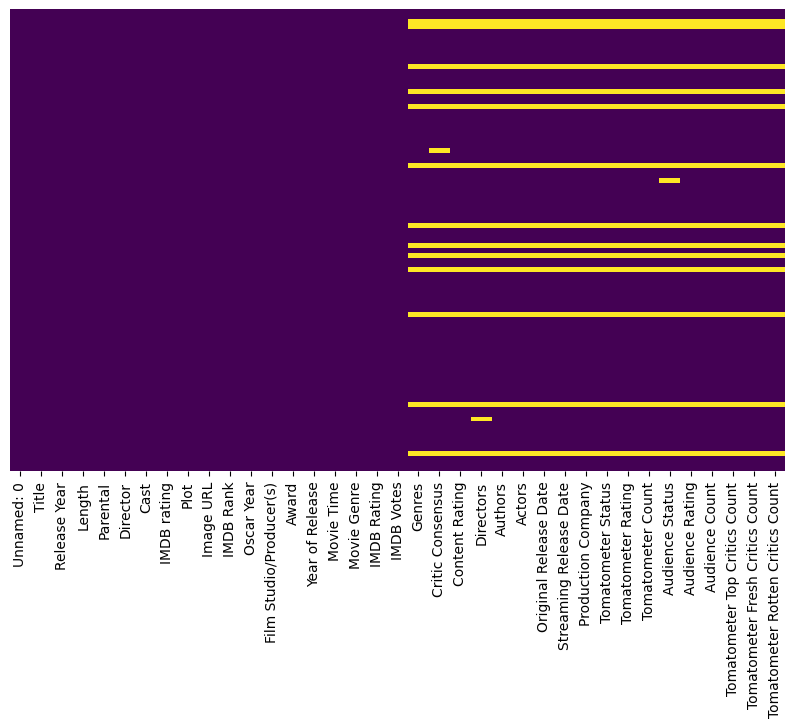

In [48]:
check_nan(inner_join)